1) Libraries & Toolkits


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})



2) Importing Dataset and exploration

In [27]:
df = pd.read_csv('merged_cars.csv')

# data shapes 
print("cars data shape : " , str(df.shape))

# old data shapes 
print("old cars data shape : " , str(df[df['new'] == 0].shape))

# new data shapes
print("new cars data shape : " , str(df[df['new'] == 1].shape))

df.head()



cars data shape :  (31900, 12)
old cars data shape :  (14741, 12)
new cars data shape :  (17159, 12)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
0,Hyundai,Accent,Sedan,Black,2007.0,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza,0
1,Hyundai,Accent,Sedan,Silver,2005.0,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena,0
2,Hyundai,Accent,Sedan,Gray,1999.0,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza,0
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009.0,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo,0
4,Hyundai,Accent,Sedan,Silver,2000.0,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza,0


In [28]:
df.info()

# columns ['Body' , 'Year' , 'Engine' ] have null values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        31900 non-null  object 
 1   Model        31900 non-null  object 
 2   Body         14741 non-null  object 
 3   Color        31900 non-null  object 
 4   Year         31898 non-null  float64
 5   Fuel         31900 non-null  object 
 6   Kilometers   31900 non-null  object 
 7   Engine       14741 non-null  object 
 8   Trasmission  31900 non-null  object 
 9   Price        31900 non-null  object 
 10  Gov          31900 non-null  object 
 11  new          31900 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 2.9+ MB


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df[df['Year'].isnull()].head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
16602,Hyundai,Accent,NaN,Silver,NaN,diesel,"138,000 Km",NaN,manual,0 EGP,El Haram,1
26885,Volkswagen,Beetle,NaN,Red,NaN,gas,0 Km,NaN,manual,"60,000 EGP",Cairo,1


In [31]:
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})
# Number of uniques values in Data


,,Number of unique values
0,Brand,94
1,Model,828
2,Body,3
3,Color,27
4,Year,58
5,Fuel,7
6,Kilometers,934
7,Engine,3
8,Trasmission,5
9,Price,1347


In [32]:
df.Brand.value_counts()


Hyundai      7471
Fiat         6148
Chevrolet    5293
Nissan       1115
Kia          1074
             ... 
JMC             1
Bentley         1
Lexus           1
Keyton          1
Perodua         1
Name: Brand, Length: 94, dtype: int64

3) Data Cleaning

In [33]:
# we can notice that fuel types doesn't make sense due to merged data 
# get the unique values of fuel type
print(df['Fuel'].unique())

# gas and Benzine are the same
df['Fuel'] = df['Fuel'].replace('gas' , 'Benzine')

# diesl and Natural/natural Gas are the same
df['Fuel'] = df['Fuel'].replace('diesel' , 'Natural Gas')
df['Fuel'] = df['Fuel'].replace('natural gas' ,  'Natural Gas')

# get the unique values of fuel type
print(df['Fuel'].unique())




['Benzine' 'Natural Gas' 'gas' 'diesel' 'natural gas' 'Electric' 'Hybrid']
['Benzine' 'Natural Gas' 'Electric' 'Hybrid']


In [34]:
# we can notice that Trasmission types doesn't make sense due to merged data
df.Trasmission = df.Trasmission.replace('automatic' , 'Automatic')
df.Trasmission = df.Trasmission.replace('manual' , 'Manual')

df.Trasmission.unique()

array(['Automatic', 'Manual', 'CVT'], dtype=object)

# 

In [35]:
# fill na value with most freq
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
# let use year value to be int
df['Year'] = df['Year'].astype(int)

print(df['Year'].unique())


[2007 2005 1999 2009 2000 2012 2010 2006 2015 2017 2001 2011 1996 2008
 2020 2013 2019 2014 2016 2022 1998 2002 2021 2004 2003 1994 1997 1995
 2018 1993 1992 1990 1976 1987 1991 1985 1977 1978 1988 1979 1975 1982
 1983 1974 1980 1989 1984 1981 1973 1986 1972 1971 1970 2023 1964 1968
 1951 1969]


In [36]:
# delete km from Kilometers
df.Kilometers = [(value).replace(' Km' , '') for value in df.Kilometers]

df.Kilometers.unique()

array(['140000 to 159999', '180000 to 199999', '10000 to 19999',
       'More than 200000', '90000 to 99999', '100000 to 119999',
       '160000 to 179999', '120000 to 139999', '0 to 9999',
       '20000 to 29999', '30000 to 39999', '80000 to 89999',
       '60000 to 69999', '70000 to 79999', '40000 to 49999',
       '50000 to 59999', '255,000', '130,000', '50,000', '165,000',
       '300,000', '190,000', '129,000', '150,000', '56,000', '51,000',
       '57,000', '120,000', '240,000', '3,000', '7,600', '140,000', '0',
       '31,000', '90,000', '175,000', '400,000', '260,000', '173,000',
       '80,000', '37,000', '200,000', '19,000', '47,000', '135,000',
       '100,000', '95,000', '106,000', '85,000', '128,000', '11,000',
       '20,000', '35,000', '125,000', '148,000', '500', '41,000',
       '82,000', '9,000', '104,000', '40,000', '189,000', '102,000',
       '170,000', '45,000', '241,000', '94,500', '5,800', '55,000',
       '5,000', '97,000', '155,000', '138,000', '30,000', '191,

In [37]:
# delete EGP from Price
df.Price = [(value).replace(' EGP' , '') for value in df.Price]

df.Price.unique()

array(['140.0', '78.0', '70.0', ..., '1,880,000', '496,000', '444,444'],
      dtype=object)

4) Pre-processing & Feature Engineering

In [38]:
# Take copy from Dataset
df_copy = df.copy()

In [39]:
def km_frmt(kilometers):
    meters = {
        '100000 to 119999': 10,
        '90000 to 99999': 9,
        '120000 to 139999': 11,
        'More than 200000': 15,
        '10000 to 19999': 1,
        '180000 to 199999': 14,
        '140000 to 159999': 12,
        '160000 to 179999': 13,
        '20000 to 29999': 2,
        '30000 to 39999': 3,
        '80000 to 89999': 8,
        '70000 to 79999': 7,
        '0 to 9999': 0,
        '60000 to 69999': 6,
        '40000 to 49999': 4,
        '50000 to 59999': 5
    }

    if kilometers in meters:
        return meters[kilometers]
    else :
        kilometers = (kilometers).replace(',' , '')
        return int(kilometers) // 10000

def color_frmt(color):
    # format categorical color to numerical
    colors = dict(zip(df['Color'].unique() , range(len(df['Color'].unique()))))
    return colors[color]

def engine_frmt(engine):
    if engine == 'More than 3000 CC':
            return 3.0
    elif engine == '1600 CC':
        return 1.6
    elif engine == '1400 - 1500 CC' :
        return 1.5
    elif engine == '1000 - 1300 CC':
        return 1.2
    elif engine  == '1800 - 2000 CC':
        return 2.0
    else:
        return 2.5
    
def fuel_frmt(fuel):
    # format categorical fuel to numerical
    fuels = dict(zip(df['Fuel'].unique() , range(len(df['Fuel'].unique()))))
    return fuels[fuel]

def brand_frmt(brand):
    # format categorical brand to numerical
    brands = dict(zip(df['Brand'].unique() , range(len(df['Brand'].unique()))))
    return brands[brand]

def price_frmt(price):
    if ',' in price:
        price = (price).replace(',' , '')
        price = int(price) // 1000
        return float(price)
    return float(price)

colors = dict(zip(range(len(df['Color'].unique())) , df['Color'].unique()))
fuels = dict(zip(range(len(df['Fuel'].unique())) , df['Fuel'].unique()))
brands = dict(zip(range(len(df['Brand'].unique())) , df['Brand'].unique()))

print("colors" ,dict(zip(df['Color'].unique() , range(len(df['Color'].unique())))))
print("fuels" ,dict(zip(df['Fuel'].unique() , range(len(df['Fuel'].unique())))))
print("brands" ,dict(zip(df['Brand'].unique() , range(len(df['Brand'].unique())))))

colors {'Black': 0, 'Silver': 1, 'Gray': 2, 'Blue- Navy Blue': 3, 'Green': 4, 'Red': 5, 'Gold': 6, 'Other Color': 7, 'Burgundy': 8, 'White': 9, 'Yellow': 10, 'Brown': 11, 'Orange': 12, 'Beige': 13, 'Bronze': 14, 'Dark blue': 15, 'Cyan': 16, 'Dark red': 17, 'Champagne': 18, 'Blue': 19, 'Mocha': 20, 'Petroleum': 21, 'Light grey': 22, 'Dark green': 23, 'Purple': 24, 'Eggplant': 25, 'Olive': 26}
fuels {'Benzine': 0, 'Natural Gas': 1, 'Electric': 2, 'Hybrid': 3}
brands {'Hyundai': 0, 'Chevrolet': 1, 'Fiat': 2, 'BMW': 3, 'Opel': 4, 'Mitsubishi': 5, 'Mercedes': 6, 'Honda': 7, 'MG': 8, 'Nissan': 9, 'Mazda': 10, 'Skoda': 11, 'Chery': 12, 'Lada': 13, 'Kia': 14, 'Daewoo': 15, 'Daihatsu': 16, 'Seat': 17, 'Speranza': 18, 'Volkswagen': 19, 'Jac': 20, 'Brilliance': 21, 'Suzuki': 22, 'Ssang Yong': 23, 'Toyota': 24, 'Renault': 25, 'Byd': 26, 'Jetour': 27, 'Peugeot': 28, 'Jeep': 29, 'Citroën': 30, 'Alfa Romeo': 31, 'Dodge': 32, 'DFSK': 33, 'Geely': 34, 'Proton': 35, 'Mahindra': 36, 'Isuzu': 37, 'Ford': 

In [40]:
# format categorical features
df_copy.Kilometers = df_copy.Kilometers.apply(km_frmt)
df_copy.Color = df_copy.Color.apply(color_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_frmt)
df_copy.Fuel = df_copy.Fuel.apply(fuel_frmt)
df_copy.Brand = df_copy.Brand.apply(brand_frmt)
df_copy.Price = df_copy.Price.apply(price_frmt)


In [41]:
# Some Features Engineerning
df_copy["Car Age"] = 2023 - df_copy["Year"]
df_copy = df_copy.drop(columns = ["Year"])
df['Price'] = df_copy['Price']
df['Price'] = df['Price'].apply(lambda e : round(e ,2))

In [42]:
df_copy.sample(10)


,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new,Car Age
299,0,Accent,Sedan,8,0,1,1.2,Manual,93.0,Asyut,0,17
10195,2,128,Sedan,3,0,8,1.2,Manual,28.0,Suez,0,22
8221,1,Cruze,Sedan,5,0,0,1.6,Automatic,149.5,Sharqia,0,10
8486,1,Lanos,Sedan,3,1,2,1.5,Manual,95.5,Suez,0,10
18617,75,Model 3,NaN,5,2,0,2.5,Automatic,2000.0,Tagamo3 - New Cairo,1,0
27577,0,Bayon,NaN,5,0,0,2.5,Automatic,700.0,Damietta,1,1
16173,5,Lancer Puma,NaN,1,0,12,2.5,Automatic,330.0,Tanta,1,18
15844,12,Arrizo 5,NaN,5,3,9,2.5,Automatic,365.0,Damanhur,1,1
2804,0,Verna,Sedan,0,0,3,1.6,Manual,78.0,Giza,0,15
884,0,Elantra,Sedan,1,0,5,1.6,Automatic,305.0,Ismailia,0,4


In [43]:
df_copy.dtypes


Brand            int64
Model           object
Body            object
Color            int64
Fuel             int64
Kilometers       int64
Engine         float64
Trasmission     object
Price          float64
Gov             object
new              int64
Car Age          int64
dtype: object

In [44]:
# Converting categorical features

nums = [] 
lbl= LabelEncoder()

for col in df_copy.loc[ : , df_copy.dtypes == object].columns:
    df_copy[col] = lbl.fit_transform(df_copy[col])
    # To know the meaning of numbers
    directory = {index: label for index , label  in enumerate(lbl.classes_)}
    nums.append(directory)
nums


[{'100': 0,
  '104': 1,
  '11': 2,
  '1100': 3,
  '116': 4,
  '118': 5,
  '120': 6,
  '1200': 7,
  '121': 8,
  '124': 9,
  '125': 10,
  '126': 11,
  '127': 12,
  '128': 13,
  '1300': 14,
  '131': 15,
  '132': 16,
  '133': 17,
  '146': 18,
  '1500': 19,
  '156': 20,
  '16': 21,
  '18': 22,
  '180': 23,
  '180B': 24,
  '19': 25,
  '190': 26,
  '2 || Mazda 2': 27,
  '200': 28,
  '2008': 29,
  '2017': 30,
  '205': 31,
  '206': 32,
  '207': 33,
  '207 SW': 34,
  '208': 35,
  '2101': 36,
  '2103': 37,
  '2104': 38,
  '2105': 39,
  '2106': 40,
  '2107': 41,
  '2110': 42,
  '2112': 43,
  '218': 44,
  '218 i': 45,
  '220': 46,
  '230': 47,
  '232': 48,
  '240': 49,
  '240Z': 50,
  '244': 51,
  '250': 52,
  '280': 53,
  '3': 54,
  '3  || Mazda 3': 55,
  '3 Series': 56,
  '3 || Mazda 3': 57,
  '300': 58,
  '3008': 59,
  '301': 60,
  '304': 61,
  '305': 62,
  '307': 63,
  '308': 64,
  '308 sw': 65,
  '316': 66,
  '318': 67,
  '320': 68,
  '323': 69,
  '325': 70,
  '328': 71,
  '330': 72,
  '330S':

In [45]:
df_copy

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new,Car Age
0,0,140,2,0,0,12,1.6,0,140.0,46,0,16
1,0,140,2,1,0,14,1.2,2,78.0,82,0,18
2,0,140,2,2,0,12,1.5,2,70.0,46,0,24
3,0,140,2,3,0,12,1.6,0,150.0,19,0,14
4,0,140,2,1,0,1,1.2,2,75.0,46,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
31761,61,126,3,5,0,17,2.5,0,625.0,100,1,10
31788,3,789,3,22,0,6,2.5,0,1650.0,92,1,6
31824,2,601,3,23,0,20,2.5,2,60.0,2,1,28
31882,1,551,3,5,0,7,2.5,2,290.0,30,1,2


<Axes: >

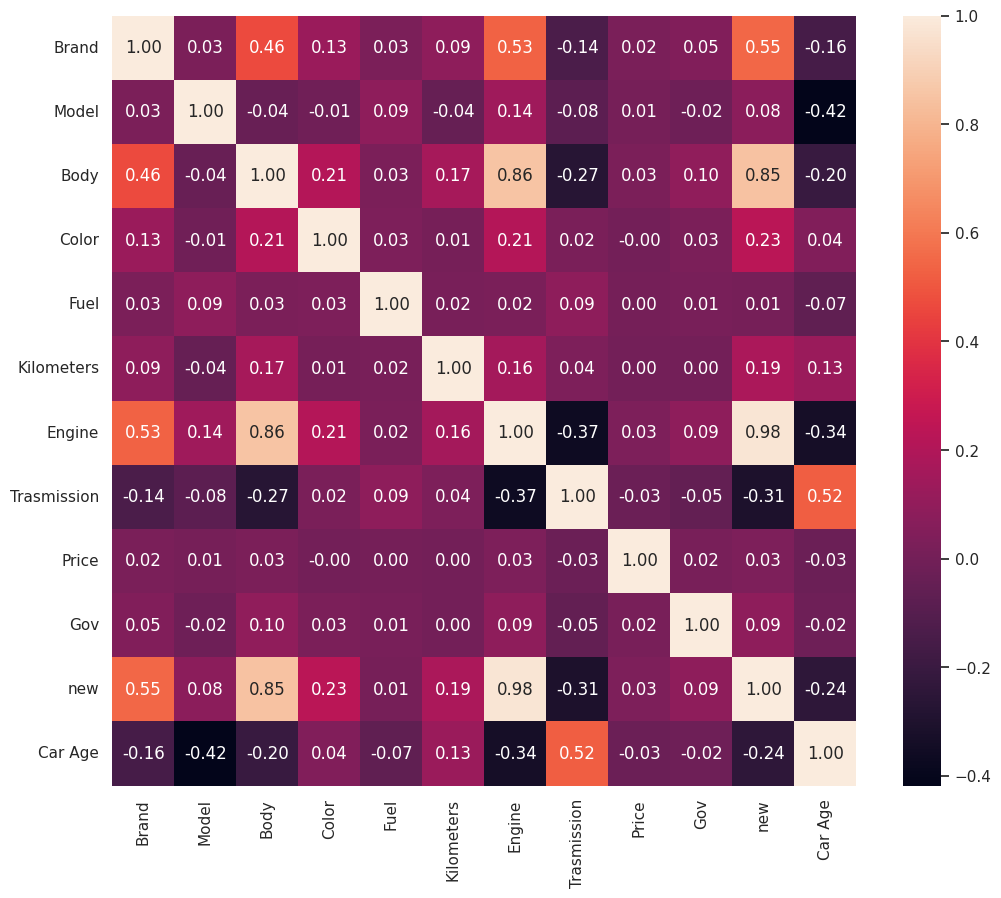

In [46]:
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

## Question Answering

### Q1. What are the highest and lowest prices of cars in the data and the highest and lowest mean for all brands’ prices?


<Axes: >

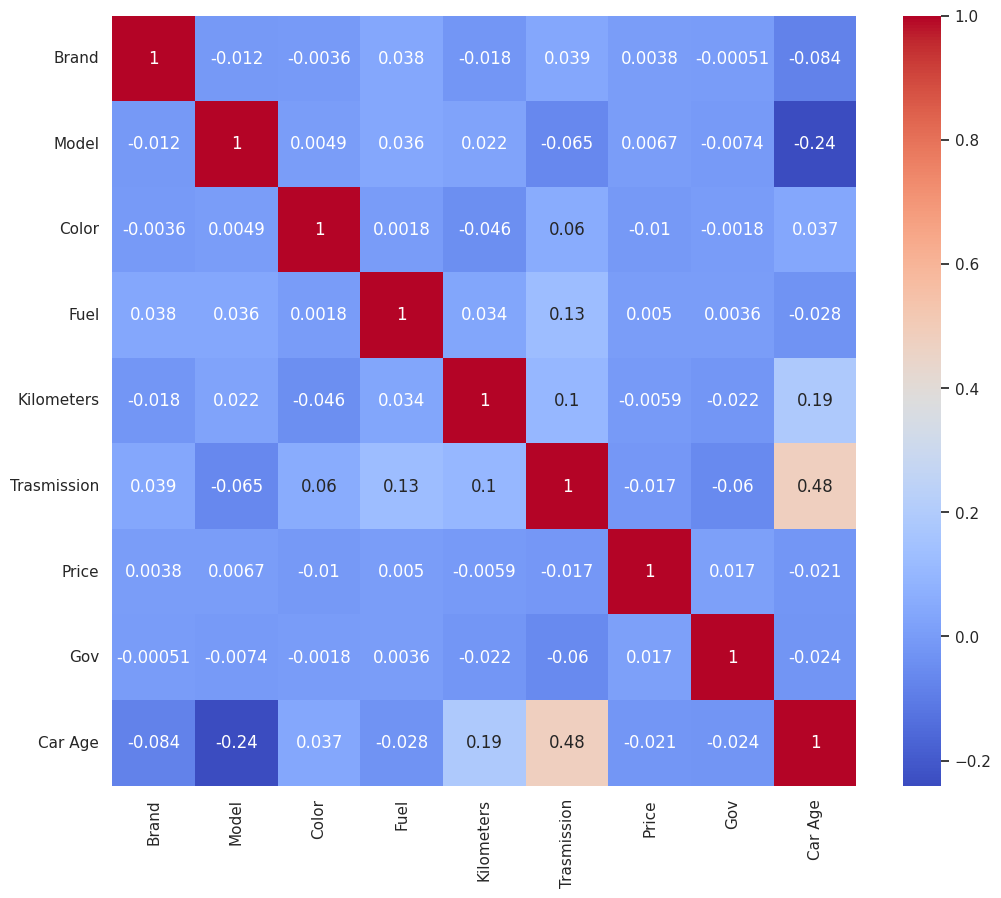

In [116]:
'''
First of all we have some prices equal to zero
It seems that there is a problem in the data collection process
We will add the prices of the cars with the same brand, model and Car age and divide them by the number of cars
'''

# By intution the price of the car is related to the brand, model and Car age
# But let's do some EDA to see the correlation between the price and the other features

df_filtered = df_copy[df_copy['Price'] != 0]
df_filtered = df_filtered[df_filtered['new'] == 1].drop(columns = ['new', 'Body','Engine'])
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [118]:
missing_prices = df_copy[df_copy['Price'] == 0]
mean_prices = df_copy[df_copy['Price'] != 0].groupby(['Brand', 'Model', 'Car Age'])['Price'].mean()
# Replace the missing or zero values with the calculated mean
df_allfilled = df_copy.copy()
df_allfilled = df_allfilled[df_allfilled['new'] == 1].drop(columns = ['new', 'Body','Engine'])
missing_prices['Price'] = missing_prices.apply(lambda row: mean_prices[(row['Brand'], row['Model'], row['Car Age'])] if (row['Brand'], row['Model'], row['Car Age']) in mean_prices.index else row['Price'] , axis=1)
missing_prices['Price'] = missing_prices['Price'].apply(lambda e : round(e ,2))
df_allfilled.update(missing_prices)

In [119]:
# Drop All rows with prce less than 15 as they all Fake ads
df_allfilled.drop(df_allfilled[df_allfilled['Price'] < 15].index, inplace=True)
# Drop more fake ads (The price more than 20000)
df_allfilled.drop(df_allfilled[df_allfilled['Price'] >= 20000].index, inplace=True)

In [120]:
df_allfilled['Price'].unique().shape

(679,)

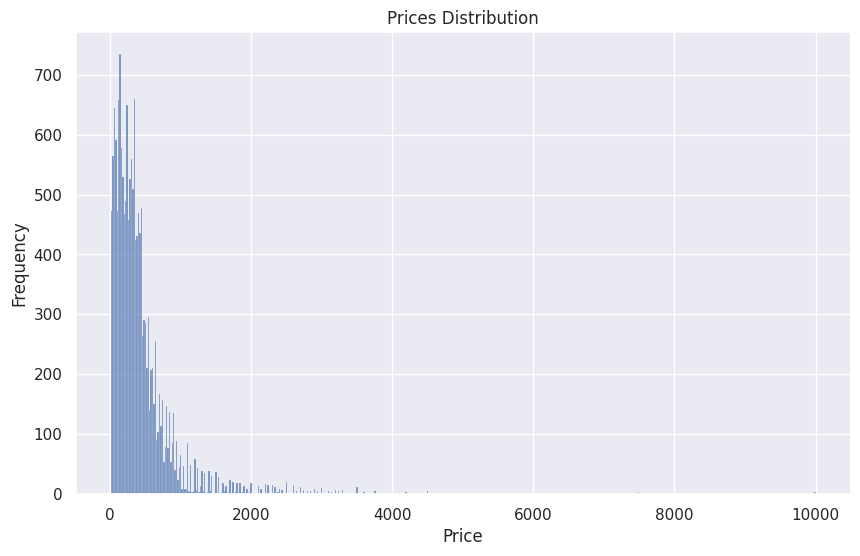

In [121]:
# Draw Prices Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_allfilled['Price'], bins=500)
plt.title('Prices Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [122]:
list(brands.values())

['Hyundai',
 'Chevrolet',
 'Fiat',
 'BMW',
 'Opel',
 'Mitsubishi',
 'Mercedes',
 'Honda',
 'MG',
 'Nissan',
 'Mazda',
 'Skoda',
 'Chery',
 'Lada',
 'Kia',
 'Daewoo',
 'Daihatsu',
 'Seat',
 'Speranza',
 'Volkswagen',
 'Jac',
 'Brilliance',
 'Suzuki',
 'Ssang Yong',
 'Toyota',
 'Renault',
 'Byd',
 'Jetour',
 'Peugeot',
 'Jeep',
 'Citroën',
 'Alfa Romeo',
 'Dodge',
 'DFSK',
 'Geely',
 'Proton',
 'Mahindra',
 'Isuzu',
 'Ford',
 'Canghe || Changhe',
 'Faw',
 'Haval',
 'Mini',
 'Foton',
 'Senova',
 'Zotye',
 'Karry',
 'Volvo',
 'Changan',
 'Land Rover',
 'Gmc',
 'Subaru',
 'Saipa',
 'Baic',
 'Infiniti',
 'Great Wall',
 'Kenbo',
 'Dongfeng',
 'Ds',
 'Jaguar',
 'Hawtai',
 'Audi',
 'Hafei',
 'Chrysler',
 'Datsun',
 'Lincoln',
 'Emgrand',
 'Victory',
 'Soueast',
 'Lifan',
 'Lancia',
 'Chana',
 'Bestune',
 'Cupra',
 'Haima',
 'Tesla',
 'Porsche',
 'Landwind',
 'JMC',
 'Kaiyi',
 'Cadillac',
 'Aston Martin',
 'Smart',
 'Maserati',
 'Pontiac',
 'Canghe  || Changhe',
 'Exeed',
 'Buick',
 'Hummer',
 '

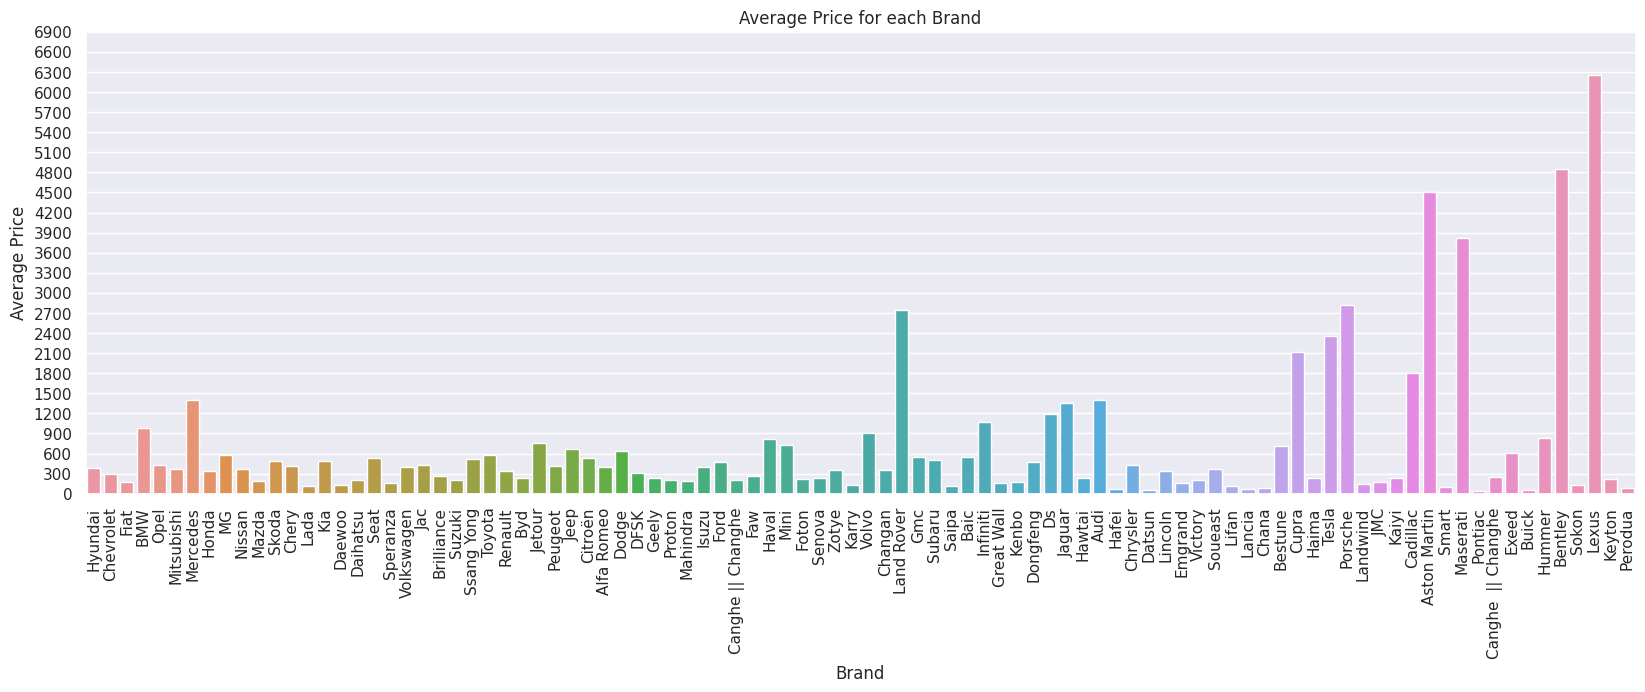

In [123]:
brand_prices = df_allfilled.groupby('Brand')['Price'].mean()
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=list(brands.values()), y=brand_prices.values)
# Change y axis to have smaller steps
ax.set_yticks(np.arange(0, 7000,300))
plt.title('Average Price for each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [124]:

highest_price = df_allfilled["Price"].max()
lowest_price = df_allfilled["Price"].min()
highest_mean = df_allfilled.groupby("Brand")["Price"].mean().max()
lowest_mean = df_allfilled.groupby("Brand")["Price"].mean().min()

print("Highest Price: ", highest_price)
print("Lowest Price: ", lowest_price)
print("Highest Mean: ", highest_mean)
print("Lowest Mean: ", lowest_mean)

Highest Price:  10000.0
Lowest Price:  15.0
Highest Mean:  6250.0
Lowest Mean:  37.0


### Q2. Does changing car color affect car price for the same car model for the collected dataset?

In [147]:
# we need to see the relation between the color and the price for same car model
# so we will group by the model and the color and get the mean of the price
# then we will plot the relation between the color and the price
models =  {v: k for k, v in nums[0].items()}

model_color_price = df_allfilled.groupby(['Brand' , 'Model'  ,'Fuel', 'Car Age' ,'Trasmission', 'Color' ])['Price'].mean().reset_index()
model_color_price['Color'] = model_color_price['Color'].apply(lambda e : colors[e])
model_color_price['grouping_column'] = (model_color_price['Brand']) + (model_color_price['Model']) + (model_color_price['Fuel']) + model_color_price['Car Age'] + model_color_price['Trasmission']
model_color_price

,Brand,Model,Fuel,Car Age,Trasmission,Color,Price,grouping_column
0,0.0,140.0,0.0,0.0,0.0,Red,600.000000,140.0
1,0.0,140.0,0.0,11.0,0.0,Silver,260.000000,151.0
2,0.0,140.0,0.0,12.0,0.0,Black,250.000000,152.0
3,0.0,140.0,0.0,12.0,0.0,Silver,272.166667,152.0
4,0.0,140.0,0.0,12.0,0.0,Gray,257.500000,152.0
...,...,...,...,...,...,...,...,...
10068,90.0,535.0,0.0,15.0,2.0,Black,85.000000,642.0
10069,90.0,536.0,0.0,15.0,2.0,White,150.000000,643.0
10070,91.0,483.0,0.0,5.0,0.0,Dark blue,6250.000000,579.0
10071,92.0,513.0,0.0,2.0,2.0,Silver,220.000000,609.0


<Figure size 2000x600 with 0 Axes>

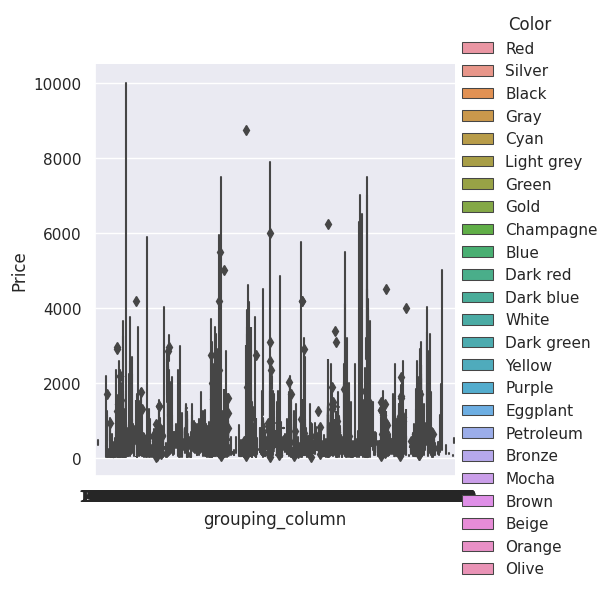

In [149]:
plt.figure(figsize=(20, 6))

sns.catplot(x='grouping_column', y='Price', hue='Color', kind='box', data=model_color_price)
